# KMENSAH_ASSIGNMENT4_GRADIENT_BOOSTING_TREES

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

In [ ]:
# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Imblearn installation

In [ ]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# Anaconda prompt
#!pip install -U imbalanced-learn

#conda install -c conda-forge imbalanced-learn

# Restart the kernel after successful installation of the library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Read the dataset (app_train)


In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/application_train.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
app_train1 = data1.copy()


In [ ]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
app_train1.shape

(307511, 122)

In [ ]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(app_train1.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [ ]:
app_train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
app_train1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# Read the dataset (bureau)

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/bureau.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
bureau = data4.copy()

In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau1=bureau[['SK_ID_CURR','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE']].copy()

In [ ]:
bureau1.shape

(1716428, 3)

In [ ]:
bureau1.head()

,SK_ID_CURR,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE
0,215354,0,0.0
1,215354,0,0.0
2,215354,0,0.0
3,215354,0,0.0
4,215354,0,0.0


In [ ]:
bureau1.tail()

,SK_ID_CURR,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE
1716423,259355,0,0.0
1716424,100044,0,0.0
1716425,100044,0,0.0
1716426,246829,0,0.0
1716427,246829,0,0.0


In [ ]:
#Pandas - groupby one column and get mean of other two columns

In [ ]:
bureau2=bureau1.groupby('SK_ID_CURR').mean()

In [ ]:
bureau2.shape

(305811, 2)

In [ ]:
app_train1.shape

(307511, 122)

In [ ]:
app_train=pd.merge(app_train1, bureau2, on = "SK_ID_CURR", how = "left")

In [ ]:
app_train.shape

(307511, 124)

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to AMT_CREDIT_SUM_OVERDUE
dtypes: float64(67), int64(41), object(16)
memory usage: 293.3+ MB


In [ ]:
#Now we continue steps from Week 2

# CREATE DATEFRAME FOR PLOTS AFTER DECIDING ON VARIABLES

In [ ]:
data=app_train

# MISSING VALUE

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')
    
    return mis_val_table_ren_columns

In [ ]:
# missing values check
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has124columns.
There are69columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

In [ ]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encoding Categorical Variables

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
        # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
           
        
            le_count +=1
        
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
app_train = pd.get_dummies(app_train)


print('Training Feature shape: ', app_train.shape)



Training Feature shape:  (307511, 245)


In [ ]:
train_labels =app_train['TARGET']



app_train['TARGET'] =train_labels

print('Training Feature shape: ', app_train.shape)


Training Feature shape:  (307511, 245)


In [ ]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 ORGANIZATION_TYPE_Security                           0.007226
OCCUPATION_TYPE_Waiters/barmen staff                 0.007802
ORGANIZATION_TYPE_Agriculture                        0.007901
WALLSMATERIAL_MODE_Wooden                            0.007946
CREDIT_DAY_OVERDUE                                   0.008118
ORGANIZATION_TYPE_Trade: type 7                      0.008170
NAME_TYPE_SUITE_Unaccompanied                        0.008301
NAME_INCOME_TYPE_Unemployed                          0.008784
ORGANIZATION_TYPE_Trade: type 3                      0.008911
OBS_60_CNT_SOCIAL_CIRCLE                             0.009022
OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff            

# From reviewing the correlations above we selected the independent variables below

# Selected Columns

1. SK_ID_CURR---ID of loan in our sample
2. TARGET---Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
3. FLAG_OWN_CAR---Flag if the client owns a car.
4. FLAG_OWN_REALTY---Flag if client owns a house or flat.
5. AMT_INCOME_TOTAL---Income of the client
6. AMT_CREDIT---Credit amount of the loan.
7. NAME_EDUCATION_TYPE---Level of highest education the client achieved.
8. DAYS_BIRTH---Client's age in days at the time of application.
9. DAYS_EMPLOYED---How many days before the application the person started current employment.

10.EXT_SOURCE_1---Normalized score from external data source

11. NAME_INCOME_TYPE---Clients income type (businessman, working, maternity leave,…)
12. CODE_GENDER---Gender of the client
13. OWN_CAR_AGE---Age of client's car

14. REGION_RATING_CLIENT
15. REGION_RATING_CLIENT_W_CITY

In [ ]:
loan=app_train[['SK_ID_CURR','TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE_Working','CODE_GENDER_M','CODE_GENDER_F','OWN_CAR_AGE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int64  
 3   FLAG_OWN_REALTY                                    307511 non-null  int64  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [ ]:
loan["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
loan.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE_Working,CODE_GENDER_M,CODE_GENDER_F,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,100002,1,0,1,202500.0,406597.5,1,-9461,-637,0.083037,0.262949,0.139376,1,1,0,NaN,2,2
1,100003,0,0,0,270000.0,1293502.5,0,-16765,-1188,0.311267,0.622246,NaN,0,0,1,NaN,1,1
2,100004,0,1,1,67500.0,135000.0,1,-19046,-225,NaN,0.555912,0.729567,1,1,0,26.0,2,2
3,100006,0,0,1,135000.0,312682.5,1,-19005,-3039,NaN,0.650442,NaN,1,0,1,NaN,2,2
4,100007,0,0,1,121500.0,513000.0,1,-19932,-3038,NaN,0.322738,NaN,1,1,0,NaN,2,2


In [ ]:
#We Do a Bivariate Analysis and pair plots to gain some additional insights

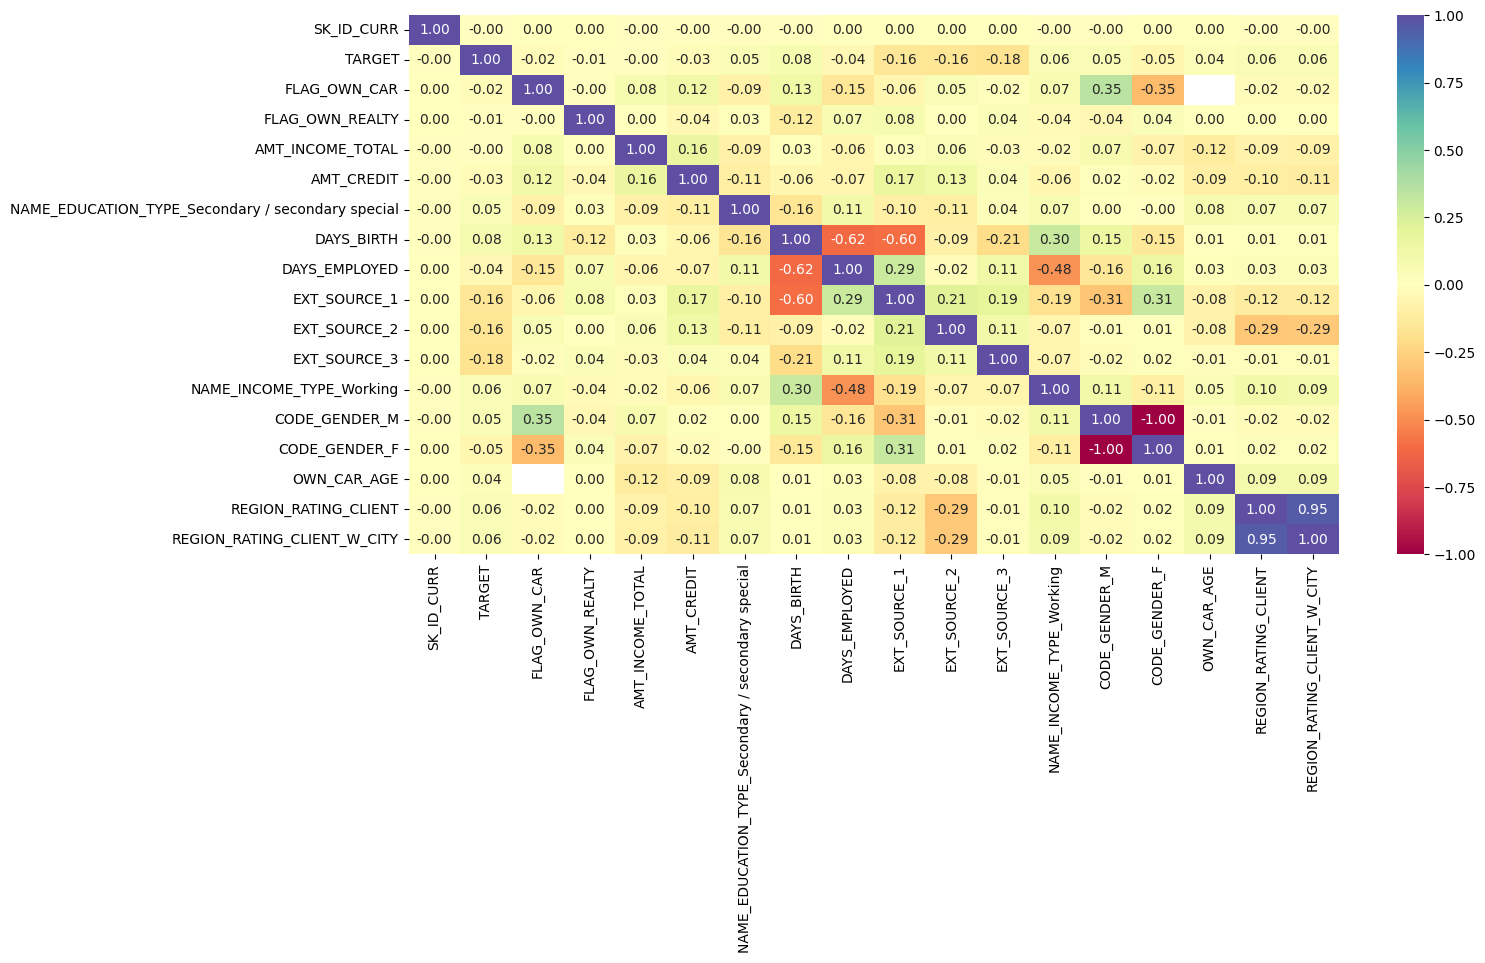

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
#Multivariate Analysis

In [ ]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns


print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'NAME_INCOME_TYPE_Working', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')


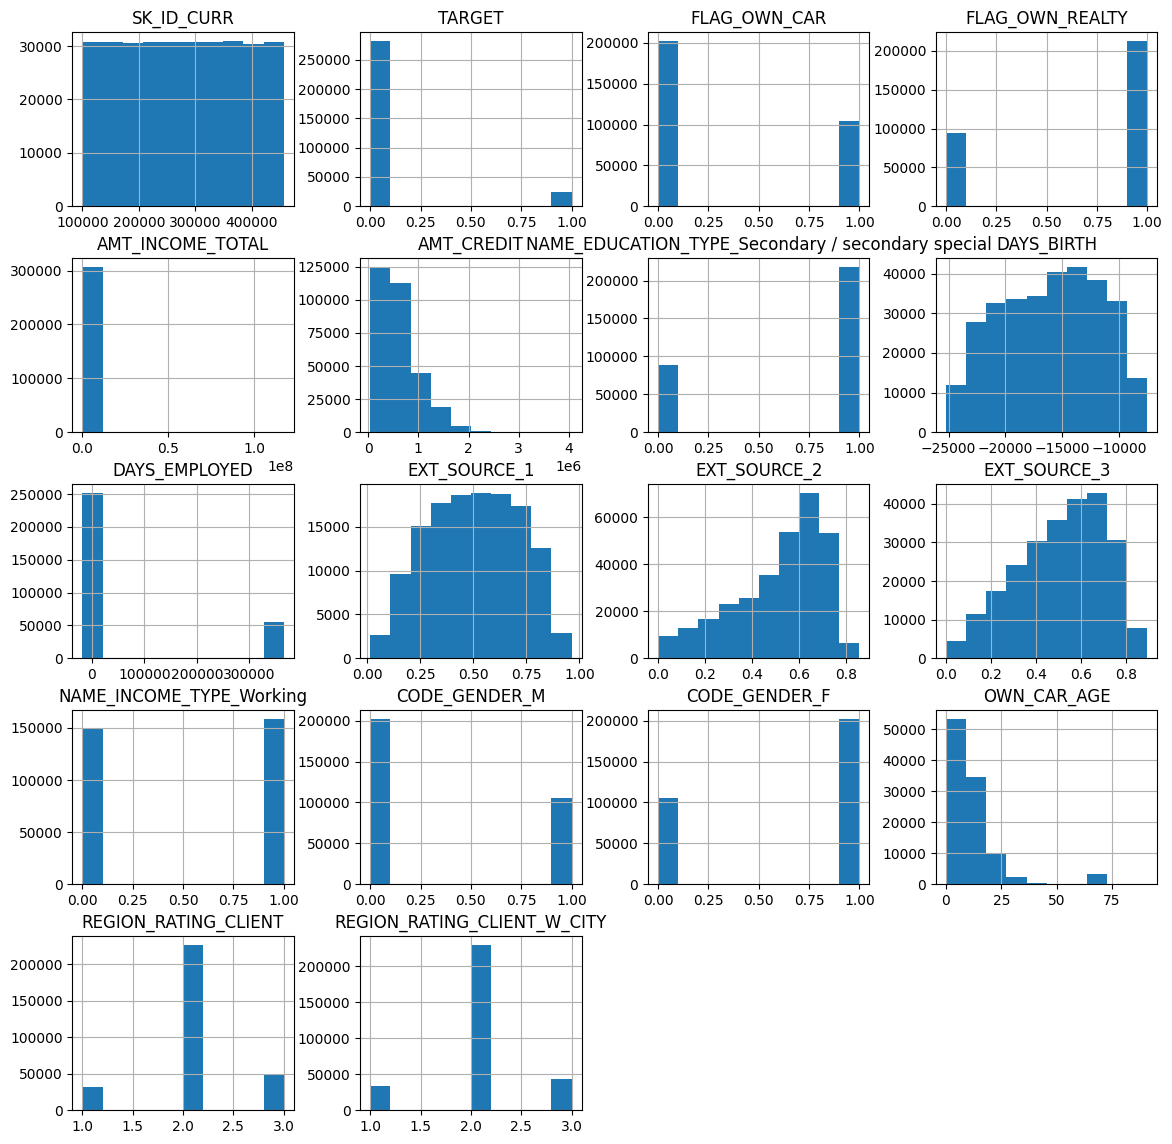

In [ ]:
# creating histograms
loan[numeric_cols].hist(figsize=(14, 14))
plt.show()

# Check for missing values on Selected Variables/Columns 

In [ ]:
loan.isnull().sum()

SK_ID_CURR                                                0
TARGET                                                    0
FLAG_OWN_CAR                                              0
FLAG_OWN_REALTY                                           0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
NAME_EDUCATION_TYPE_Secondary / secondary special         0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
EXT_SOURCE_1                                         173378
EXT_SOURCE_2                                            660
EXT_SOURCE_3                                          60965
NAME_INCOME_TYPE_Working                                  0
CODE_GENDER_M                                             0
CODE_GENDER_F                                             0
OWN_CAR_AGE                                          202929
REGION_RATING_CLIENT                    

In [ ]:
#We will select Eleven for this exercise we will add REGION_RATING_CLIENT

# FINAL Eleven

From above the Final 11 Variables to be focused on will be:

    1. FLAG_OWN_CAR
    
    2. FLAG_OWN_REALTY
    
    3. AMT_INCOME_TOTAL
    
    4. AMT_CREDIT
    
    5. NAME_EDUCATION_TYPE
    
    6. DAYS_BIRTH
    
    7. DAYS_EMPLOYED
    
    8. EXT_SOURCE_2
    
    9. NAME_INCOME_TYPE
    
    10. CODE_GENDER
    
    11. REGION_RATING_CLIENT
    
    
    These 11 were selected because based on research of the domain, strong correlation to TARGET and minimal missing values which will  require substantial imputation of values.
    

# Model Building Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune/Oversample/Undersample the model if required.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int64  
 3   FLAG_OWN_REALTY                                    307511 non-null  int64  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [ ]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

307511

Since all the values in SK_ID_CURR column are unique we can drop it

In [ ]:
loan11=data[['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_2','NAME_INCOME_TYPE','CODE_GENDER','REGION_RATING_CLIENT']]

In [ ]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                307511 non-null  int64  
 1   FLAG_OWN_CAR          307511 non-null  int64  
 2   FLAG_OWN_REALTY       307511 non-null  int64  
 3   AMT_INCOME_TOTAL      307511 non-null  float64
 4   AMT_CREDIT            307511 non-null  float64
 5   NAME_EDUCATION_TYPE   307511 non-null  object 
 6   DAYS_BIRTH            307511 non-null  int64  
 7   DAYS_EMPLOYED         307511 non-null  int64  
 8   EXT_SOURCE_2          306851 non-null  float64
 9   NAME_INCOME_TYPE      307511 non-null  object 
 10  CODE_GENDER           307511 non-null  object 
 11  REGION_RATING_CLIENT  307511 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


In [ ]:
loan11.isnull().sum()

TARGET                    0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
NAME_EDUCATION_TYPE       0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
EXT_SOURCE_2            660
NAME_INCOME_TYPE          0
CODE_GENDER               0
REGION_RATING_CLIENT      0
dtype: int64

# Missing Value Treatment

In [ ]:
print('Imputing median value for EXT_SOURCE_2 with Nan values:')
loan11['EXT_SOURCE_2'].fillna(loan11['EXT_SOURCE_2'].median(), inplace=True)
print('Imputing done. Lets check if any of records have Nan Seats')
print(loan11[loan11['EXT_SOURCE_2'].isna()].count().sum())
print('EXT_SOURCE_2:')
loan11['EXT_SOURCE_2'].value_counts()

Imputing median value for EXT_SOURCE_2 with Nan values:
Imputing done. Lets check if any of records have Nan Seats
0
EXT_SOURCE_2:


0.285898    721
0.565961    662
0.262258    417
0.265256    343
0.159679    322
           ... 
0.115152      1
0.062815      1
0.009800      1
0.150713      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [ ]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                307511 non-null  int64  
 1   FLAG_OWN_CAR          307511 non-null  int64  
 2   FLAG_OWN_REALTY       307511 non-null  int64  
 3   AMT_INCOME_TOTAL      307511 non-null  float64
 4   AMT_CREDIT            307511 non-null  float64
 5   NAME_EDUCATION_TYPE   307511 non-null  object 
 6   DAYS_BIRTH            307511 non-null  int64  
 7   DAYS_EMPLOYED         307511 non-null  int64  
 8   EXT_SOURCE_2          307511 non-null  float64
 9   NAME_INCOME_TYPE      307511 non-null  object 
 10  CODE_GENDER           307511 non-null  object 
 11  REGION_RATING_CLIENT  307511 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


In [ ]:
loan11.isnull().sum()

TARGET                  0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
NAME_EDUCATION_TYPE     0
DAYS_BIRTH              0
DAYS_EMPLOYED           0
EXT_SOURCE_2            0
NAME_INCOME_TYPE        0
CODE_GENDER             0
REGION_RATING_CLIENT    0
dtype: int64

In [ ]:
#Select a sample of 1000. Using the full population of the app_train dataset requires 300 GB RAM that I do not have

In [ ]:
loan12=loan11.sample(n=1000, random_state=1)

# Split Data

In [ ]:
# separating the independent and dependent variables

X = loan12.drop(["TARGET"], axis=1)
y = loan12["TARGET"]

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,CODE_GENDER_M
64282,0,1,135000.0,654498.0,-20614,365243,0.622652,2,0,0,0,1,1,0,0,0
94645,1,1,135000.0,234576.0,-9080,-1080,0.655960,2,0,0,0,1,0,0,1,1
306349,1,1,112500.0,157914.0,-15933,-114,0.670793,1,0,0,0,1,0,0,1,1
258314,1,0,247500.0,1125000.0,-9926,-1061,0.486120,2,0,1,0,0,0,0,1,1
87597,0,1,202500.0,900000.0,-11757,-1593,0.247563,2,0,0,0,1,0,0,1,1


# Splitting the data into X and y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Building the model

We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.


First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.


We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.


Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

# AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9371428571428572
Accuracy on test set :  0.9033333333333333
Recall on training set :  0.16
Recall on test set :  0.0
Precision on training set :  0.8
Precision on test set :  0.0


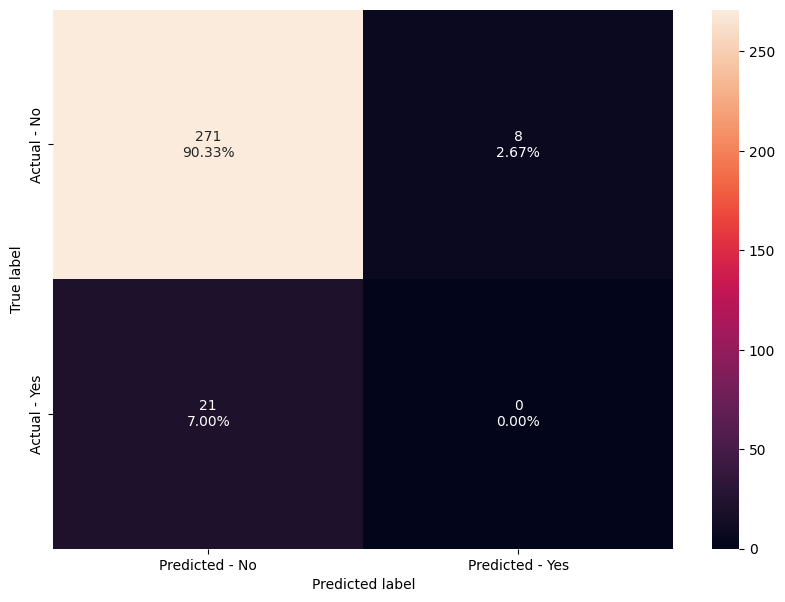

In [ ]:
make_confusion_matrix(abc,y_test)

# Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.98
Accuracy on test set :  0.9166666666666666
Recall on training set :  0.72
Recall on test set :  0.0
Precision on training set :  1.0
Precision on test set :  0.0


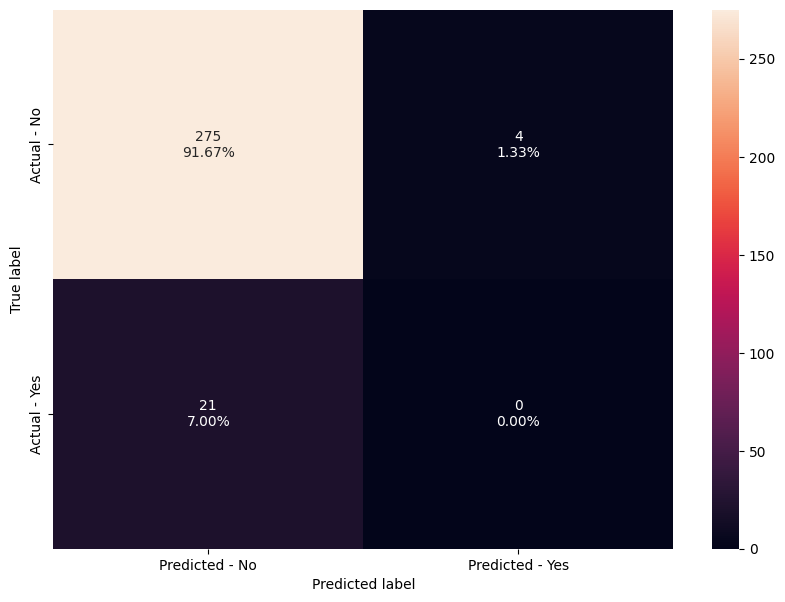

In [ ]:
make_confusion_matrix(gbc,y_test)

With default parameters:

# XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.92
Recall on training set :  1.0
Recall on test set :  0.047619047619047616
Precision on training set :  1.0
Precision on test set :  0.2


# Hyperparameter Tuning

AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Some important hyperparamters are:

    1. base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    
    2. n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    
    3. learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1.9000000000000001, n_estimators=10,
                   random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.94
Accuracy on test set :  0.8866666666666667
Recall on training set :  0.3
Recall on test set :  0.0
Precision on training set :  0.6818181818181818
Precision on test set :  0.0


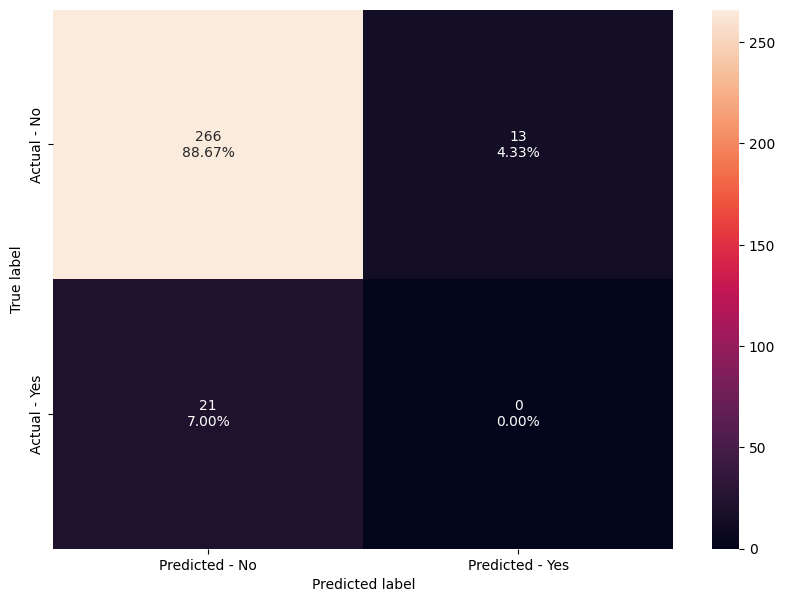

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

Insights

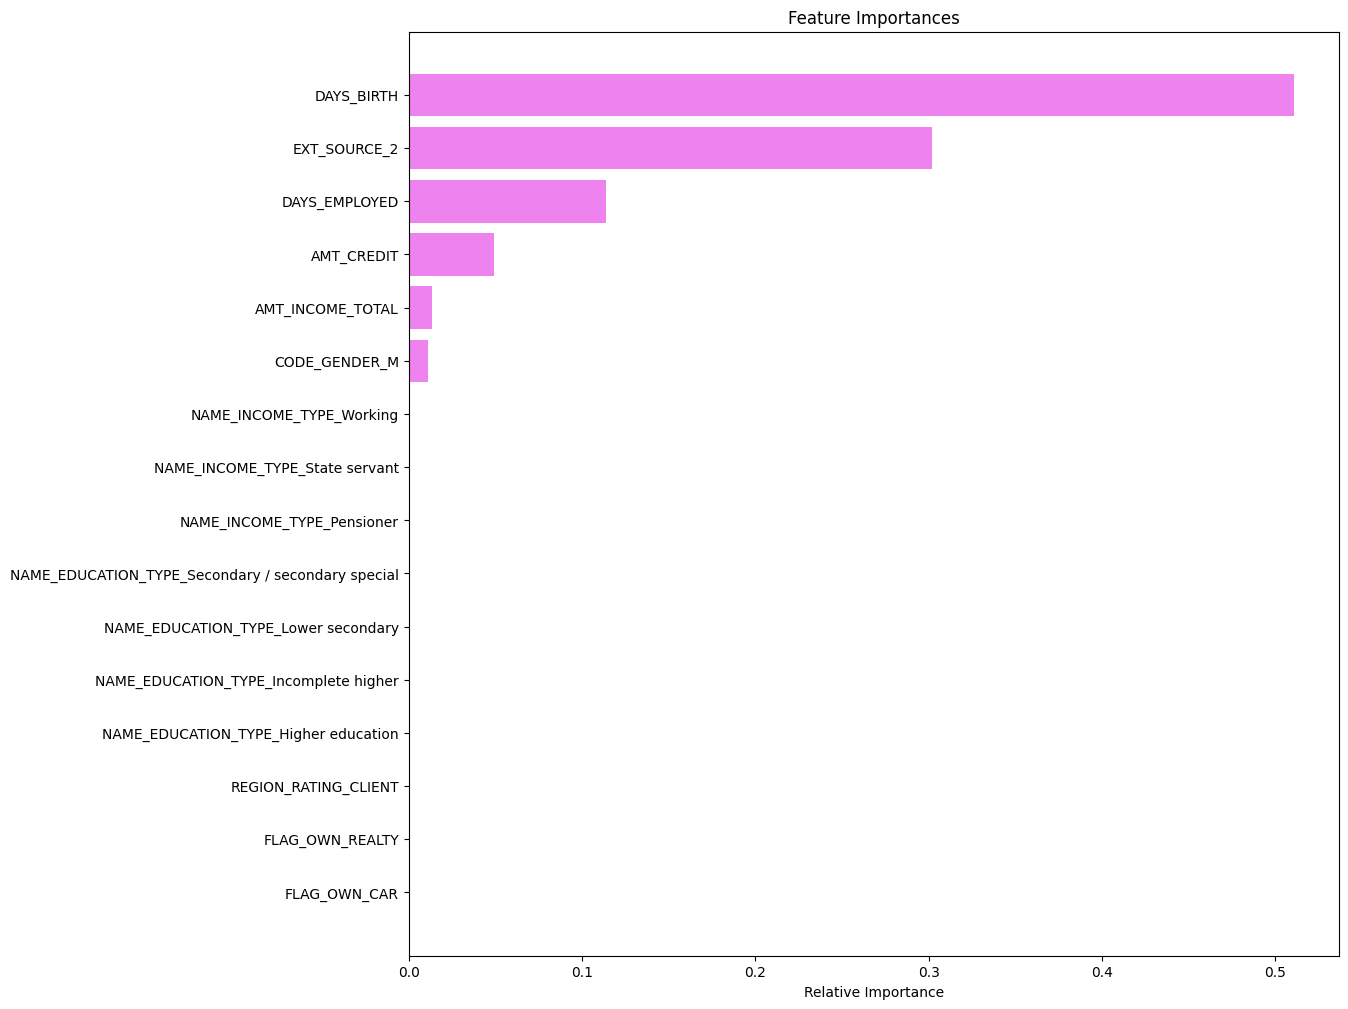

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Gradient Boosting Classifier

Most of the hyperparameters available are same as random forest classifier.

init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.

There is no class_weights parameter in gradient boosting.

Let's try using AdaBoost classifier as the estimator for initial predictions

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9771428571428571
Accuracy on test set :  0.91
Recall on training set :  0.68
Recall on test set :  0.0
Precision on training set :  1.0
Precision on test set :  0.0


As compared to the model with default parameters:

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9842857142857143
Accuracy on test set :  0.9133333333333333
Recall on training set :  0.78
Recall on test set :  0.0
Precision on training set :  1.0
Precision on test set :  0.0


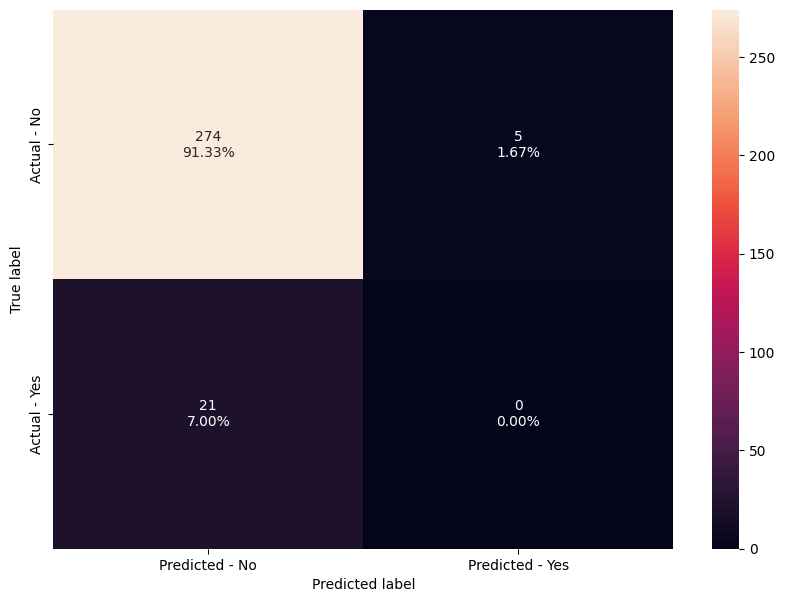

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

Insights

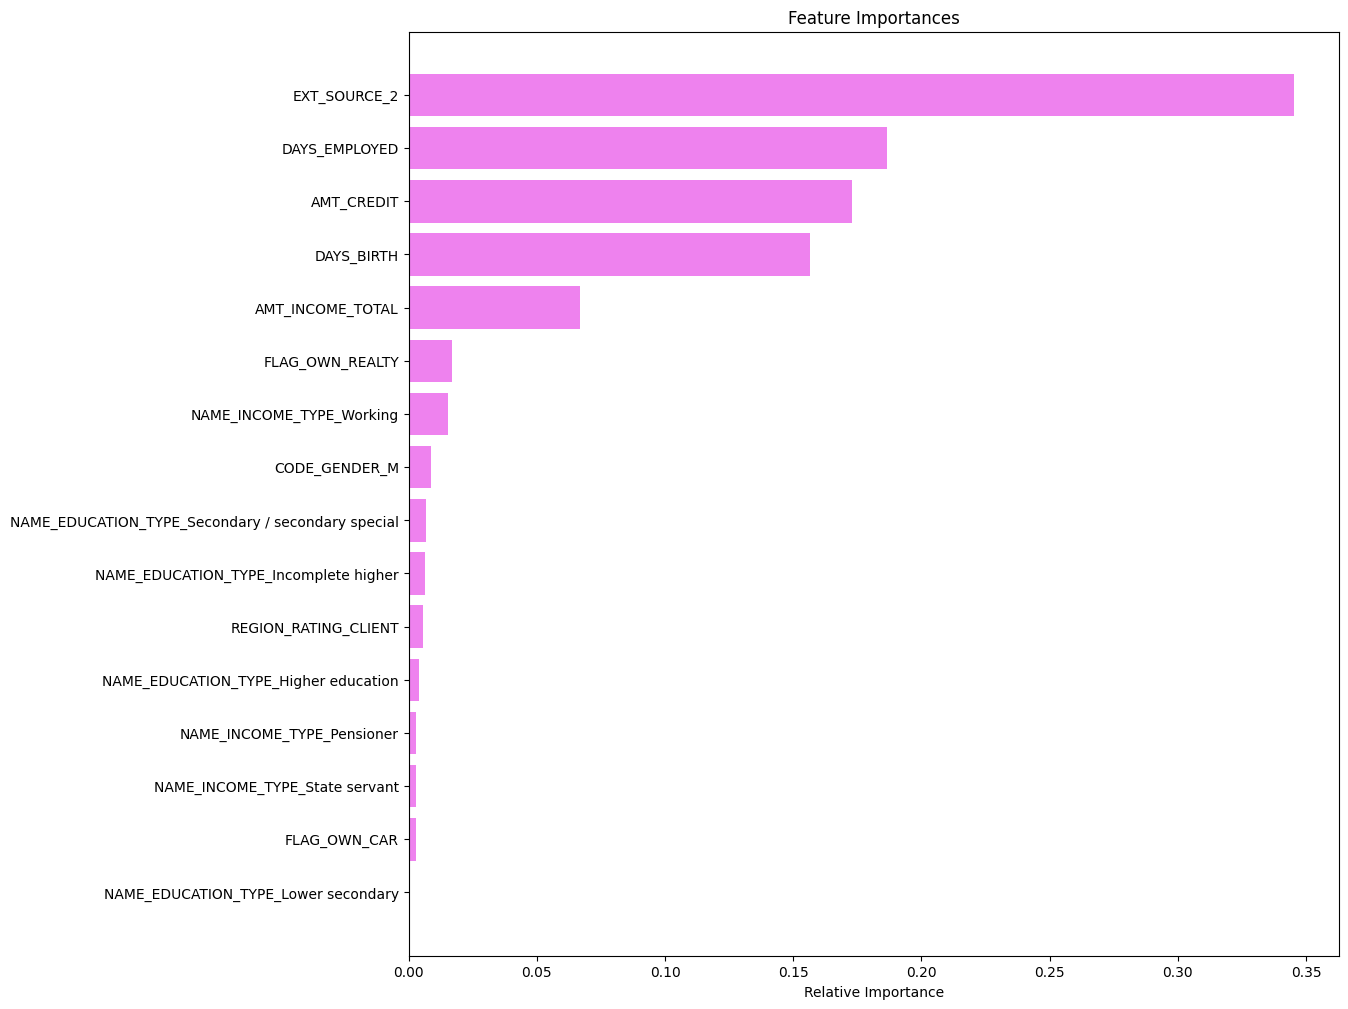

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost Classifier

XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation here. Some of the important parameters are:

scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to  ∞
 .

subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.

colsample_bytree: Corresponds to the fraction of features (the columns) to use.
    
colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
    
colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
    
max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
    
learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
    
gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9442857142857143
Accuracy on test set :  0.8833333333333333
Recall on training set :  0.56
Recall on test set :  0.14285714285714285
Precision on training set :  0.6222222222222222
Precision on test set :  0.15


In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

Insights

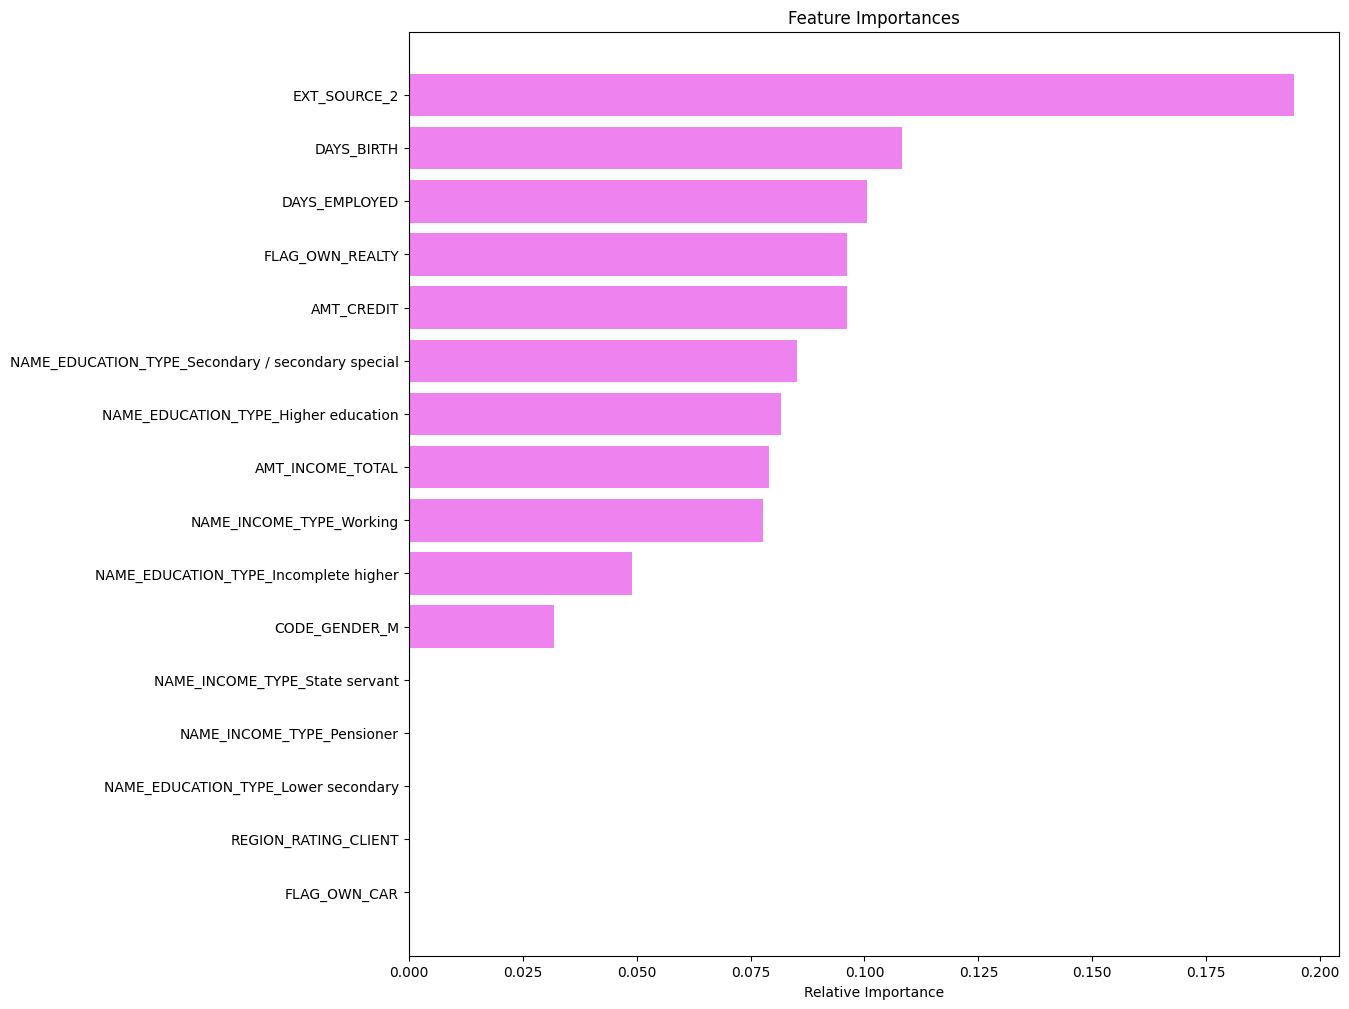

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing all models

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.94,0.90,0.16,0.00,0.80,0.00
1,AdaBoost Tuned,0.94,0.89,0.30,0.00,0.68,0.00
2,Gradient Boosting with default parameters,0.98,0.92,0.72,0.00,1.00,0.00
3,Gradient Boosting with init=AdaBoost,0.98,0.91,0.68,0.00,1.00,0.00
4,Gradient Boosting Tuned,0.98,0.91,0.78,0.00,1.00,0.00
5,XGBoost with default parameters,1.00,0.92,1.00,0.05,1.00,0.20
6,XGBoost Tuned,0.94,0.88,0.56,0.14,0.62,0.15
